In [25]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [26]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [27]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [28]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [29]:
data_baseline = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_amplitude_base.nc', decode_times=True)

In [30]:
data_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_amplitude_oae.nc', decode_times=True)

In [31]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [32]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [33]:
month_length_baseline = dataframe_base.time_counter.dt.days_in_month
alk_base = ((dataframe_base * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

In [34]:
month_length_oae = dataframe_oae.time_counter.dt.days_in_month
alk_oae = ((dataframe_oae * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

### Averaged Annual Amplitude of Alkalinity for the last ten years without OAE

In [35]:
alk_max_base = alk_base.resample(time_counter='AS').max('time_counter')

In [36]:
alk_min_base = alk_base.resample(time_counter='AS').min('time_counter')

In [37]:
alk_amplitude_base = (alk_max_base['ALK'] - alk_min_base['ALK']).to_dataset(name='ALK')

In [38]:
alk_amplitude_base_map = (alk_amplitude_base.ALK.mean(dim=('time_counter'))).to_dataset(name='ALK')

Text(0.5, 1.06, 'Alkalinity seasonal cycle amplitude without OAE')

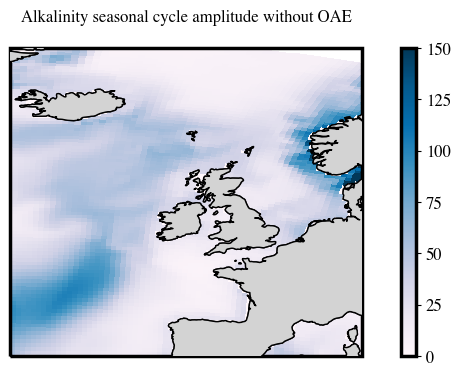

In [39]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=alk_amplitude_base_map.ALK.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat",
    add_colorbar=False, cmap="PuBu", vmin = 0, vmax = 150
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('Alkalinity seasonal cycle amplitude without OAE', fontname="Times", fontsize=12, y=1.06)

### Averaged Annual Amplitude of Alkalinity for the last ten years with OAE

In [40]:
alk_max_oae = alk_oae.resample(time_counter='AS').max('time_counter')

In [41]:
alk_min_oae = alk_oae.resample(time_counter='AS').min('time_counter')

In [42]:
alk_amplitude_oae = (alk_max_oae['ALK'] - alk_min_oae['ALK']).to_dataset(name='ALK')

In [43]:
alk_amplitude_oae_map = (alk_amplitude_oae.ALK.mean(dim=('time_counter'))).to_dataset(name='ALK')

Text(0.5, 1.06, 'Alkalinity seasonal cycle amplitude with OAE')

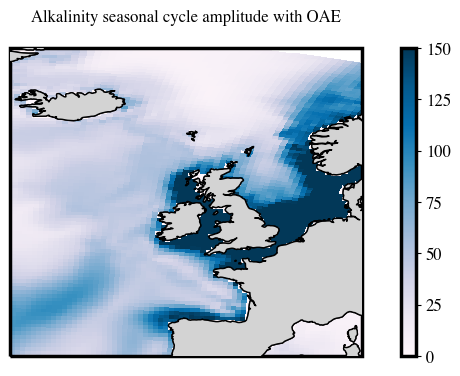

In [44]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=alk_amplitude_oae_map.ALK.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = 0, vmax = 150, cmap="PuBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('Alkalinity seasonal cycle amplitude with OAE', fontname="Times", fontsize=12, y=1.06)

### Δ Alkalinity between Baseline and OAE scenario

In [45]:
alk_amplitude_change = alk_amplitude_oae - alk_amplitude_base

In [46]:
alk_amplitude_change_map = (alk_amplitude_change.ALK.mean(dim=('time_counter'))).to_dataset(name='ALK')

Text(0.5, 1.06, 'Alkalinity seasonal cycle difference between with and without OAE')

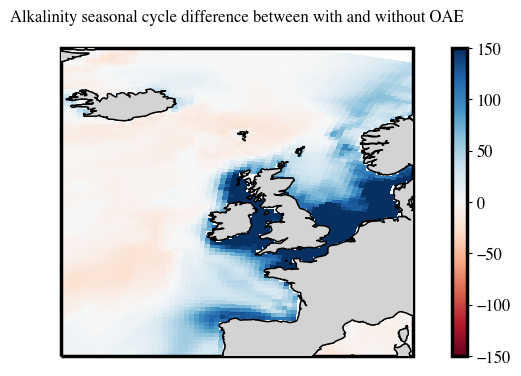

In [47]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

im=alk_amplitude_change_map.ALK.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=False, vmin = -150, vmax = 150, cmap="RdBu"
)
ax.coastlines()
ax.set_extent([-25, 10, 40, 70])

cb = plt.colorbar(im, shrink=1)

for t in cb.ax.get_yticklabels():
     t.set_fontsize(12)

plt.title('Alkalinity seasonal cycle difference between with and without OAE', fontname="Times", fontsize=12, y=1.06)

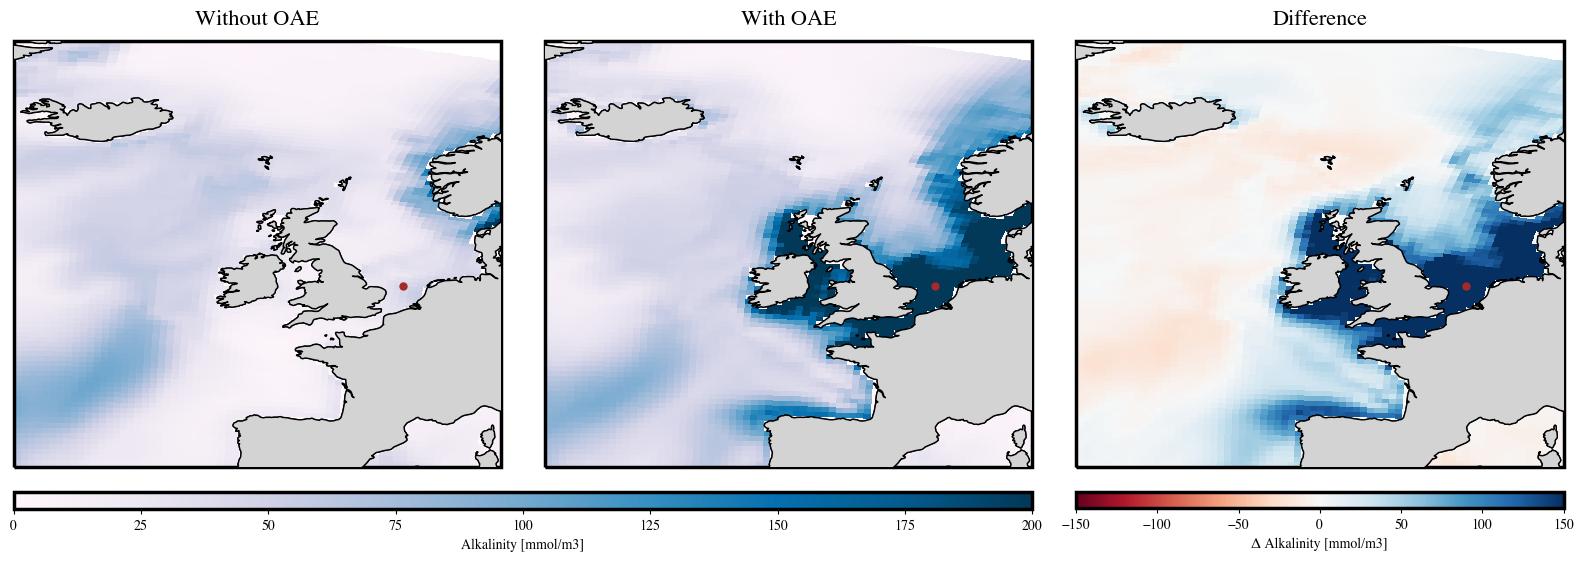

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im1 = alk_amplitude_base_map.ALK.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=200,
        cmap="PuBu",
        add_colorbar=False
    )
    
im2 = alk_amplitude_oae_map.ALK.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=200,
        cmap="PuBu",
        add_colorbar=False
    )
    
im3 = alk_amplitude_change_map.ALK.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=-150,
        vmax=150,
        cmap="RdBu", 
        add_colorbar=False
    )

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.coastlines()
    ax.set_extent([-25, 10, 40, 70])
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')
    ax.plot(3, 53, "o", color='brown', markersize=5)

for ax in axes: 
    if ax == ax1:
        ax.set_title("Without OAE", fontsize=16, y=1.02)
    elif ax == ax2:
        ax.set_title("With OAE", fontsize=16, y=1.02),
    else:
        ax.set_title("Difference", fontsize=16, y=1.02)    

font_size = 10
        
cbar = plt.colorbar(im1, ax = [ax1, ax2], aspect = 60, pad=0.04, location='bottom')
cbar.set_label('Alkalinity [mmol/m3]', fontsize=10)
cbar.ax.tick_params(labelsize=font_size)

cb3= plt.colorbar(im3,ax=ax3, aspect = 30, pad=0.04, location='bottom')
cb3.set_label('Δ Alkalinity [mmol/m3]', fontsize=10)
cb3.ax.yaxis.get_offset_text().set(size=10)
cb3.ax.tick_params(labelsize=font_size)

pass

#fig.suptitle('Seasonal Cycle Amplitude of Alkalinity (average over the last decade)', fontname='Times', fontsize=15, y=0.81)
plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Alkalinity/figs/Alk_seasonal_cycle.png')

### Amplitude at Location Point

In [26]:
alk_base_sliced = dataframe_base.where((3 < dataframe_base.nav_lon) & (dataframe_base.nav_lon < 3.1) & (52 < dataframe_base.nav_lat) & (dataframe_base.nav_lat < 53), drop=True)
alk_oae_sliced = dataframe_oae.where((3 < dataframe_oae.nav_lon) & (dataframe_oae.nav_lon < 3.1) & (52 < dataframe_oae.nav_lat) & (dataframe_oae.nav_lat < 53), drop=True)

In [27]:
alk_max_base_slc = alk_base_sliced.resample(time_counter='AS').max('time_counter')

In [28]:
alk_min_base_slc = alk_base_sliced.resample(time_counter='AS').min('time_counter')

In [29]:
alk_amplitude_base_slc = (alk_max_base_slc['ALK'] - alk_min_base_slc['ALK']).to_dataset(name='ALK')

In [30]:
alk_max_base_slc = alk_max_base_slc.ALK.mean(dim=('time_counter'))
alk_min_base_slc = alk_min_base_slc.ALK.mean(dim=('time_counter'))
alk_amplitude_base_slc = alk_amplitude_base_slc.ALK.mean(dim=('time_counter'))

In [31]:
alk_max_oae_slc = alk_oae_sliced.resample(time_counter='AS').max('time_counter')

In [32]:
alk_min_oae_slc = alk_oae_sliced.resample(time_counter='AS').min('time_counter')

In [33]:
alk_amplitude_oae_slc = (alk_max_oae_slc['ALK'] - alk_min_oae_slc['ALK']).to_dataset(name='ALK')

In [34]:
alk_max_oae_slc = alk_max_oae_slc.ALK.mean(dim=('time_counter'))
alk_min_oae_slc = alk_min_oae_slc.ALK.mean(dim=('time_counter'))
alk_amplitude_oae_slc = alk_amplitude_oae_slc.ALK.mean(dim=('time_counter'))

### Map of EU Seasonal Average of Alkalinity without OAE

In [49]:
month_length = dataframe_base.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (dataframe_base * weights).groupby("time_counter.season").sum(dim="time_counter")

In [50]:
ds_weighted_baseline = ds_weighted_baseline.where(ds_weighted_baseline)

In [51]:
ds_unweighted_baseline = dataframe_base.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

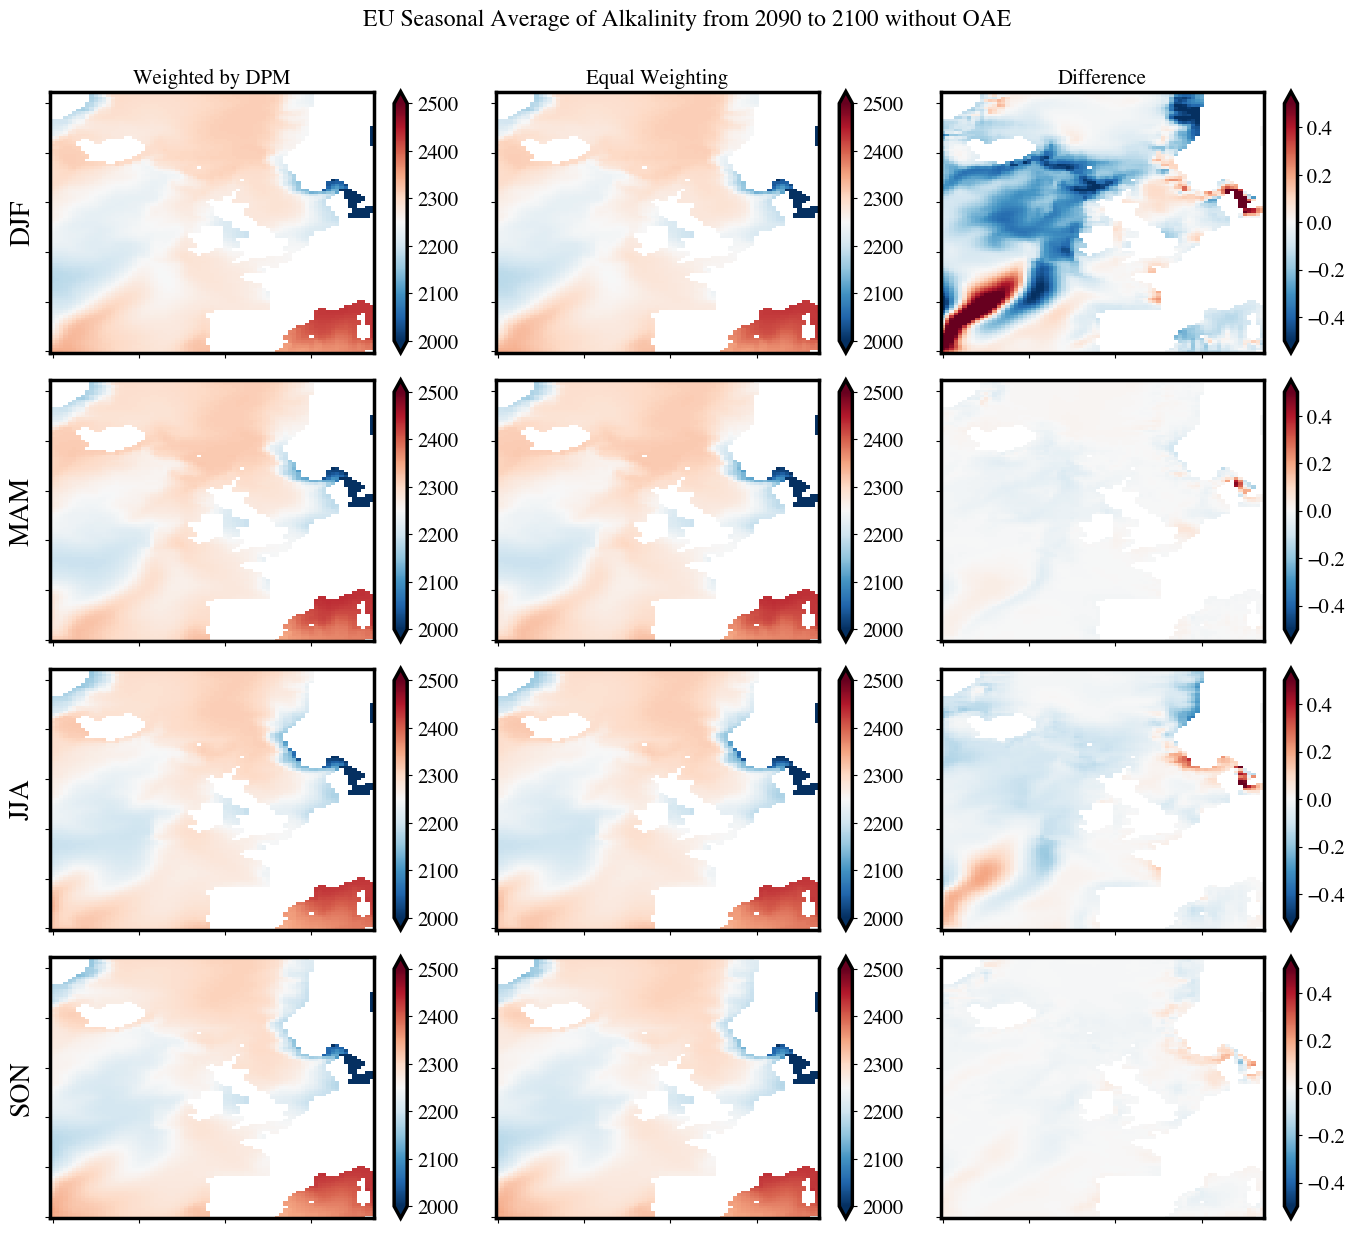

In [53]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["ALK"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["ALK"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["ALK"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of Alkalinity with OAE

In [39]:
month_length = dataframe_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (dataframe_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [40]:
ds_weighted_oae = ds_weighted_oae.where(ds_weighted_oae)

In [41]:
ds_unweighted_oae = dataframe_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

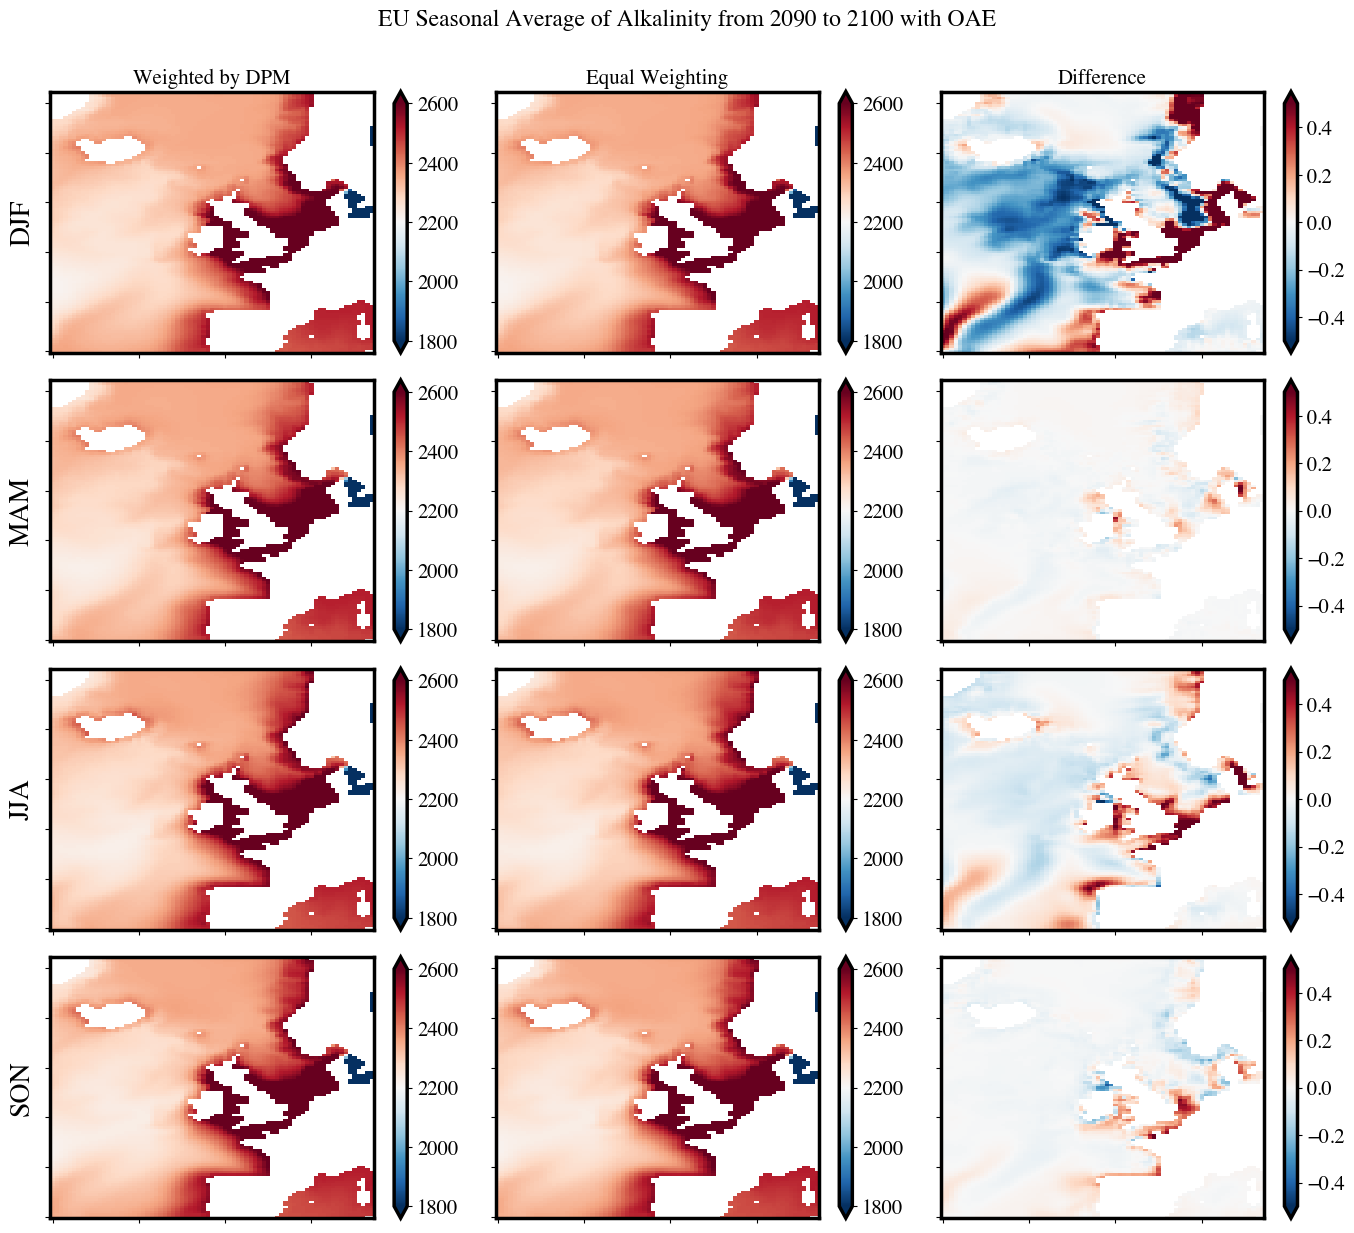

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["ALK"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=1800,
        vmax=2600,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["ALK"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=1800,
        vmax=2600,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["ALK"].sel(season=season).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass